In [2]:
%pip install seaborn

  Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 548.1 kB/s eta 0:00:001m540.5 kB/s eta 0:00:01
Using cached pandas-2.2.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import nltk
import spacy
from nltk.corpus import wordnet as wn
from nltk.wsd import lesk
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [5]:

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/rikato/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rikato/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/rikato/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:

# Load spaCy English model
# Try to load spaCy English model, with error handling
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy English model...")
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.1 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [8]:

## Word Sense Disambiguation

def perform_wsd(sentence):
    # Tokenize the sentence
    tokens = nltk.word_tokenize(sentence)
    
    # Perform part-of-speech tagging
    pos_tags = nltk.pos_tag(tokens)
    
    # Perform WSD using the Lesk algorithm
    disambiguated_words = []
    for word, pos in pos_tags:
        synset = lesk(sentence, word)
        if synset:
            disambiguated_words.append((word, synset.definition()))
        else:
            disambiguated_words.append((word, "No definition found"))
    
    return disambiguated_words


In [9]:

def visualize_wsd(disambiguated_words):
    words = [word for word, _ in disambiguated_words]
    definitions = [definition for _, definition in disambiguated_words]
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=words, y=[len(d) for d in definitions])
    plt.title("Word Sense Disambiguation")
    plt.xlabel("Words")
    plt.ylabel("Definition Length")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [10]:

## Named Entity Recognition

def perform_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

def visualize_ner(entities):
    entity_types = [ent_type for _, ent_type in entities]
    type_counts = Counter(entity_types)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(type_counts.keys()), y=list(type_counts.values()))
    plt.title("Named Entity Recognition")
    plt.xlabel("Entity Types")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


Word Sense Disambiguation:
The: No definition found
bank: a container (usually with a slot in the top) for keeping money at home
by: so as to pass a given point
the: No definition found
river: a large natural stream of water (larger than a creek)
is: represent, as of a character on stage
a: one of the four nucleotides used in building DNA; all four nucleotides have a common phosphate group and a sugar (ribose)
good: (often used as a combining form) in a good or proper or satisfactory manner or to a high standard (`good' is a nonstandard dialectal variant for `well')
place: a point located with respect to surface features of some region
to: No definition found
fish: (astrology) a person who is born while the sun is in Pisces
.: No definition found


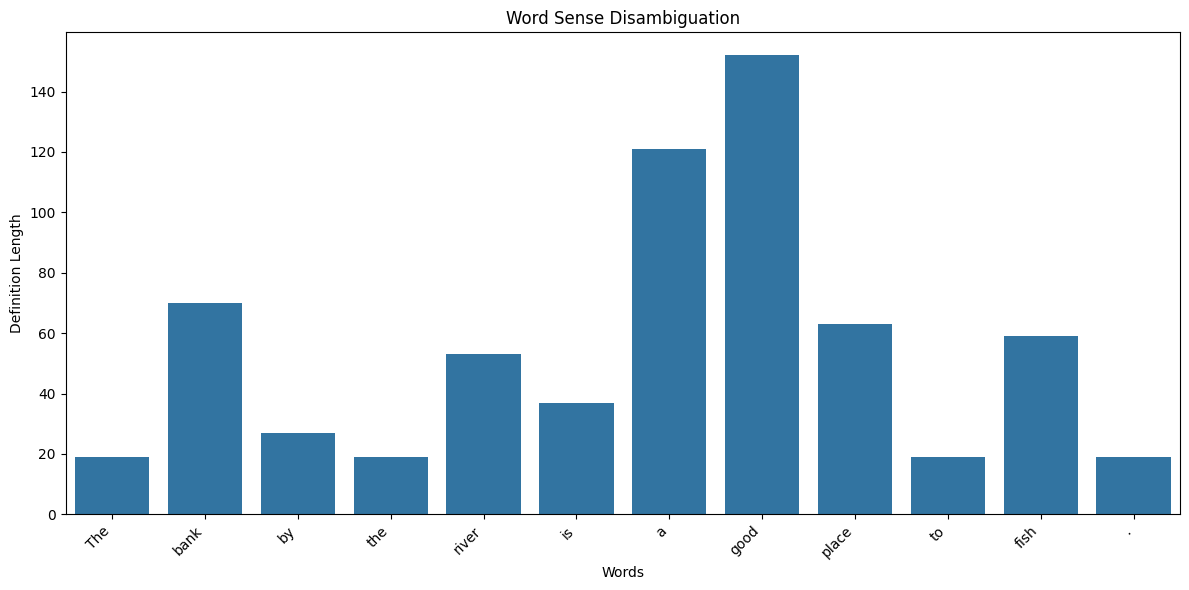


Named Entity Recognition:
Apple Inc.: ORG
New York City: GPE
next month: DATE
Tim Cook: PERSON
yesterday: DATE


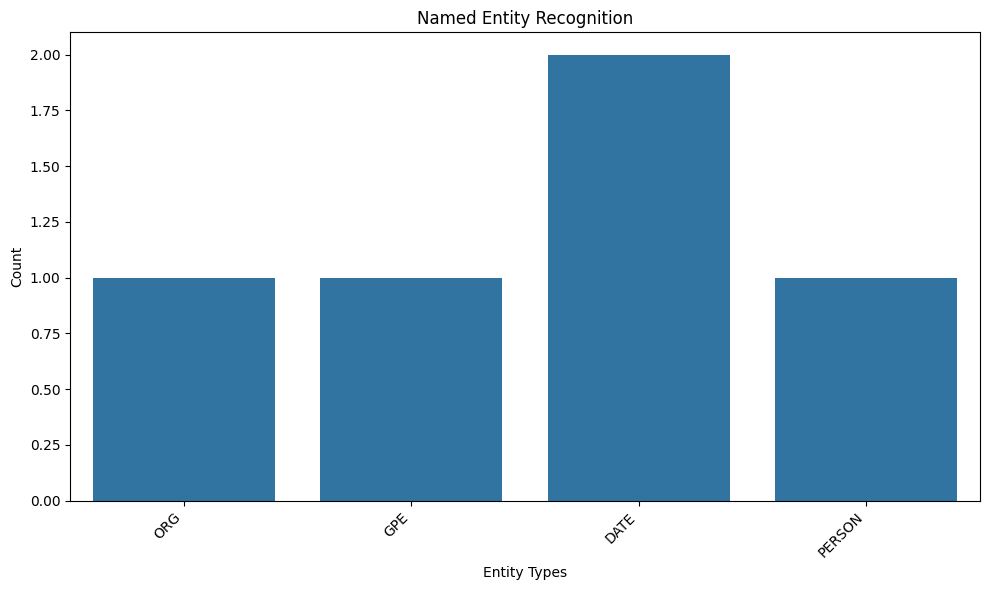

In [11]:
# Example sentence for WSD
wsd_sentence = "The bank by the river is a good place to fish."
print("Word Sense Disambiguation:")
disambiguated_words = perform_wsd(wsd_sentence)
for word, definition in disambiguated_words:
    print(f"{word}: {definition}")
visualize_wsd(disambiguated_words)

print("\nNamed Entity Recognition:")
# Example text for NER
ner_text = "Apple Inc. is planning to open a new store in New York City next month. CEO Tim Cook made the announcement yesterday."
entities = perform_ner(ner_text)
for entity, entity_type in entities:
    print(f"{entity}: {entity_type}")
visualize_ner(entities)